In [2]:
%matplotlib inline
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import shap
import seaborn as sns
sns.set() 

In [3]:
train_data = pd.read_csv("./training.csv")

In [4]:
train_data.describe() 

,last GFR,age,months until dialysis,diabetic,diabetic family,cardiopathic,cardiopathic family,hypertension episodes,hypertension episodes family,anemic,...,hemoglobin,hemoglobin delta,leukocytes average,specific gravity standard deviation,GFR standard deviation last 4 months,GFR standard deviation last year,transplanted,male,GFR delta last 4 months,GFR delta last year
count,3199.000000,3199.000000,3199.000000,3199.000000,3199.000000,3199.000000,3199.000000,3199.000000,3199.000000,3199.000000,...,3199.000000,3199.000000,3199.000000,3199.000000,3199.000000,3199.000000,3199.000000,3199.000000,3199.000000,3199.000000
mean,23.639216,68.068146,13.607377,0.408565,0.065333,0.248515,0.026258,0.733354,0.044076,0.308534,...,10.163442,0.219540,25.021015,0.239372,3.910567,5.575679,0.068146,0.678024,3.736707,10.625462
std,5.768374,13.217396,15.897959,0.491645,0.247151,0.432220,0.159927,0.442275,0.205297,0.461960,...,2.668085,2.872693,36.821003,7.254100,3.279255,3.290402,0.252036,0.467307,6.906449,8.622795
min,15.020000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.100000,-6.630000,2.692299,0.000000,0.000000,0.000000,0.000000,0.000000,-16.254867,-15.110979
25%,18.452337,61.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,9.500000,-1.159233,7.061176,0.000768,1.262225,3.715486,0.000000,0.000000,-0.682476,4.237160
50%,22.955225,71.000000,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,10.500000,-0.050000,10.180000,0.001345,3.808660,5.525198,0.000000,1.000000,2.622363,10.085833
75%,28.521883,78.000000,19.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,11.600000,0.650000,23.935000,0.001720,5.670496,6.852133,0.000000,1.000000,7.538337,15.994124
max,34.956144,93.000000,116.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,16.000000,16.400000,262.986250,290.065093,20.157448,15.125007,1.000000,1.000000,35.724421,41.914052


## 模型用到的特征 Features used 
age  
anemic：  
aspartate aminotransferase cardiopathic  
chlorine  
creatinine  
creatinine delta  
diabetic  
erythrocytes  
erythrocytes delta  
GFR delta last 4 months  
GFR delta last year  
GFR standard deviation last 4 months  
GFR standard deviation last year hematocrit  
hemoglobin  
hypertension episodes  
last GFR  
male  
mean corpuscular hemoglobin mean corpuscular volume potassium  
sodium  
specific gravity standard deviation urate  
urea  
urea delta  

In [5]:
#define the selected 27 features
SELECTED_27_FEATURES = ["age", "anemic", "aspartate aminotransferase", "cardiopathic", "chlorine",
                        "creatinine", "creatinine delta","diabetic", "erythrocytes", "erythrocytes delta", 
                        "GFR delta last 4 months", "GFR delta last year", "GFR standard deviation last 4 months",
                        "GFR standard deviation last year", "hematocrit", "hemoglobin", "hypertension episodes",
                        "last GFR", "male", "mean corpuscular hemoglobin", "mean corpuscular volume", "potassium",
                        "sodium", "specific gravity standard deviation", "urate", "urea", "urea delta",'class']

In [6]:
test_data = pd.read_csv('./test.csv')

In [7]:
test_data.describe() 

,last GFR,age,months until dialysis,diabetic,diabetic family,cardiopathic,cardiopathic family,hypertension episodes,hypertension episodes family,anemic,...,hemoglobin,hemoglobin delta,leukocytes average,specific gravity standard deviation,GFR standard deviation last 4 months,GFR standard deviation last year,transplanted,male,GFR delta last 4 months,GFR delta last year
count,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,...,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,23.729057,68.767573,13.827554,0.427366,0.059981,0.257732,0.029991,0.743205,0.044986,0.292409,...,10.204264,0.140279,23.106084,0.071930,3.888151,5.511302,0.069353,0.679475,3.475808,10.507841
std,5.741372,12.820172,16.666981,0.494928,0.237563,0.437591,0.170641,0.437070,0.207370,0.455082,...,2.587136,2.673925,33.786334,0.264436,3.199014,3.279800,0.254173,0.466897,6.741299,8.662148
min,15.021040,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.100000,-5.716216,2.730110,0.000000,0.000000,0.000000,0.000000,0.000000,-15.796968,-18.790144
25%,18.696876,62.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,9.500000,-1.209817,6.888123,0.000829,1.277209,3.730669,0.000000,0.000000,-0.831401,4.212806
50%,23.090000,72.000000,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,10.500000,-0.060000,9.432500,0.001345,3.808660,5.525198,0.000000,1.000000,2.672401,9.718010
75%,28.193814,78.000000,19.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,11.600000,0.673214,22.969097,0.001700,5.572404,6.814834,0.000000,1.000000,7.154023,15.953525
max,34.956144,93.000000,120.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,15.900000,14.425000,255.540000,1.061880,15.762266,15.708803,1.000000,1.000000,35.298455,40.769911


In [8]:
#Get a full dataset
all_data = pd.concat([train_data,test_data],axis=0)

In [9]:
all_data.describe() 

,last GFR,age,months until dialysis,diabetic,diabetic family,cardiopathic,cardiopathic family,hypertension episodes,hypertension episodes family,anemic,...,hemoglobin,hemoglobin delta,leukocytes average,specific gravity standard deviation,GFR standard deviation last 4 months,GFR standard deviation last year,transplanted,male,GFR delta last 4 months,GFR delta last year
count,4266.000000,4266.000000,4266.000000,4266.000000,4266.000000,4266.000000,4266.000000,4266.000000,4266.000000,4266.000000,...,4266.000000,4266.000000,4266.000000,4266.000000,4266.000000,4266.000000,4266.000000,4266.000000,4266.000000,4266.000000
mean,23.661686,68.243085,13.662447,0.413268,0.063994,0.250820,0.027192,0.735818,0.044304,0.304501,...,10.173653,0.199716,24.542057,0.197492,3.904960,5.559578,0.068448,0.678387,3.671452,10.596043
std,5.761091,13.121177,16.092056,0.492478,0.244772,0.433536,0.162661,0.440948,0.205793,0.460250,...,2.647829,2.824190,36.091569,6.283308,3.259012,3.287487,0.252543,0.467150,6.865659,8.631788
min,15.020000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.100000,-6.630000,2.692299,0.000000,0.000000,0.000000,0.000000,0.000000,-16.254867,-18.790144
25%,18.551494,61.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,9.500000,-1.182143,6.990139,0.000816,1.264227,3.717102,0.000000,0.000000,-0.721609,4.235746
50%,23.020918,71.000000,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,10.500000,-0.054497,9.997889,0.001345,3.808660,5.525198,0.000000,1.000000,2.638286,9.987715
75%,28.439200,78.000000,19.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,11.600000,0.650000,23.682386,0.001720,5.655876,6.851989,0.000000,1.000000,7.442823,15.982129
max,34.956144,93.000000,120.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,16.000000,16.400000,262.986250,290.065093,20.157448,15.708803,1.000000,1.000000,35.724421,41.914052


## Train a binary model
1<12 mths, 2>=12 mths

In [10]:
#define the corresponding class depending on the variable "months until dialysis"
# 1st class if "months until dialysis" < 12,
# 2nd class otherwise
all_data['class'] = all_data.apply(lambda x : (1 if x["months until dialysis"] < 12   else  2),axis=1)

In [11]:
X = all_data[SELECTED_27_FEATURES].iloc[:,:-1]
y = all_data['class']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=39)

<AxesSubplot:ylabel='count'>

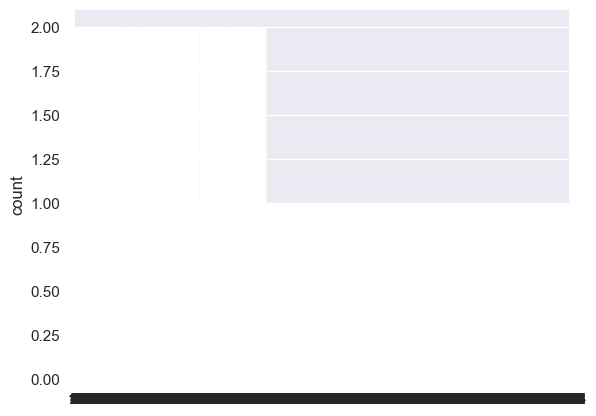

In [13]:
sns.countplot(y_train)

<AxesSubplot:ylabel='count'>

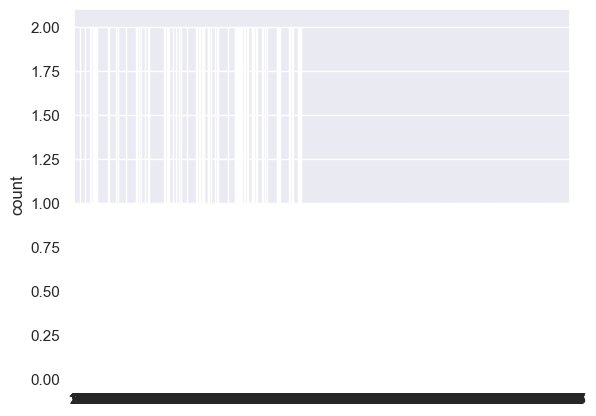

In [14]:
sns.countplot(y_test)

In [15]:
from sklearn.ensemble import ExtraTreesClassifier

In [17]:
from sklearn.ensemble import ExtraTreesClassifier

etc_2 = ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                             criterion='gini', max_depth=None, max_features='auto',
                             max_leaf_nodes=None, max_samples=None,
                             min_impurity_decrease=0.0, 
                             min_samples_leaf=1, min_samples_split=2,
                             min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=-1,
                             oob_score=False, random_state=39, verbose=0,
                             warm_start=False)


In [18]:
#Train full dataset
etc_2.fit(X,y)

ExtraTreesClassifier(n_estimators=250, n_jobs=-1, random_state=39)

In [19]:
import shap

In [20]:
shap.initjs() 

In [21]:
explainer = shap.Explainer(etc_2.predict,X)

In [22]:
pred = etc_2.predict_proba(X.head(1))

In [23]:
shap_values=explainer(X.iloc[3:4,:])

In [24]:
shap.force_plot(shap_values[0],plot_cmap='BrBG',contribution_threshold=0.01)

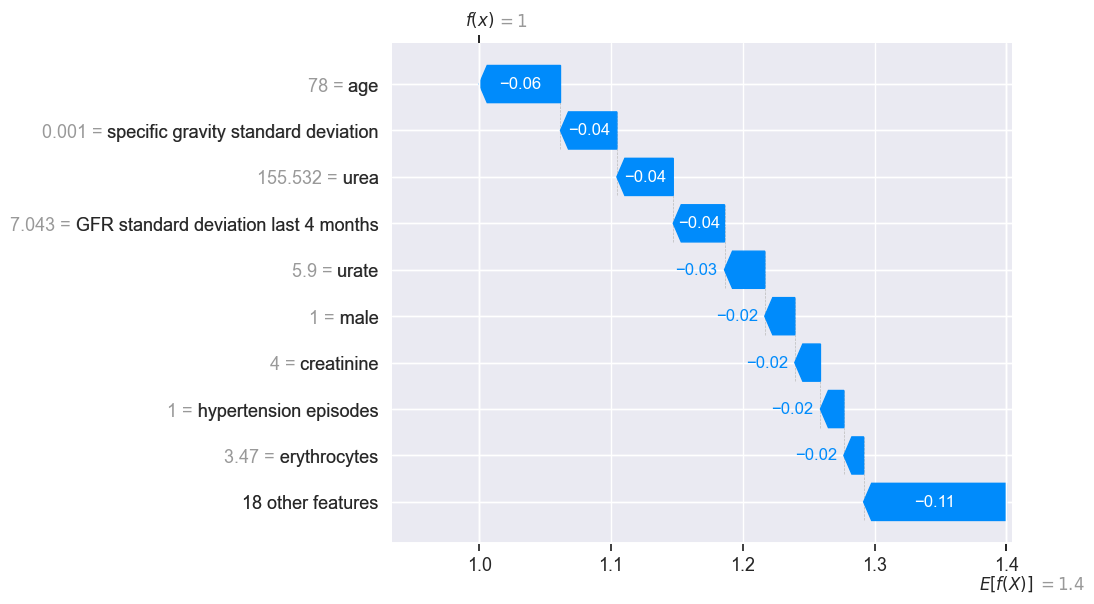

In [25]:
shap.waterfall_plot(shap_values[0])

## Export model and explaination data

In [26]:
import pickle

In [27]:
pickle.dump(etc_2,open('etc_2c.pkl','wb'))
pickle.dump(explainer, open('explainer_2c.pkl', 'wb')) 

In [28]:
#Test exported model
etc_file = pickle.load(open('etc_2c.pkl','rb'))
explainer_file = pickle.load(open('explainer_2c.pkl','rb'))

In [29]:
etc_file.predict_proba(X.head(1))

array([[1., 0.]])

In [30]:
shaps = explainer_file(X.head(1))

In [31]:
shap.force_plot(shaps[0])

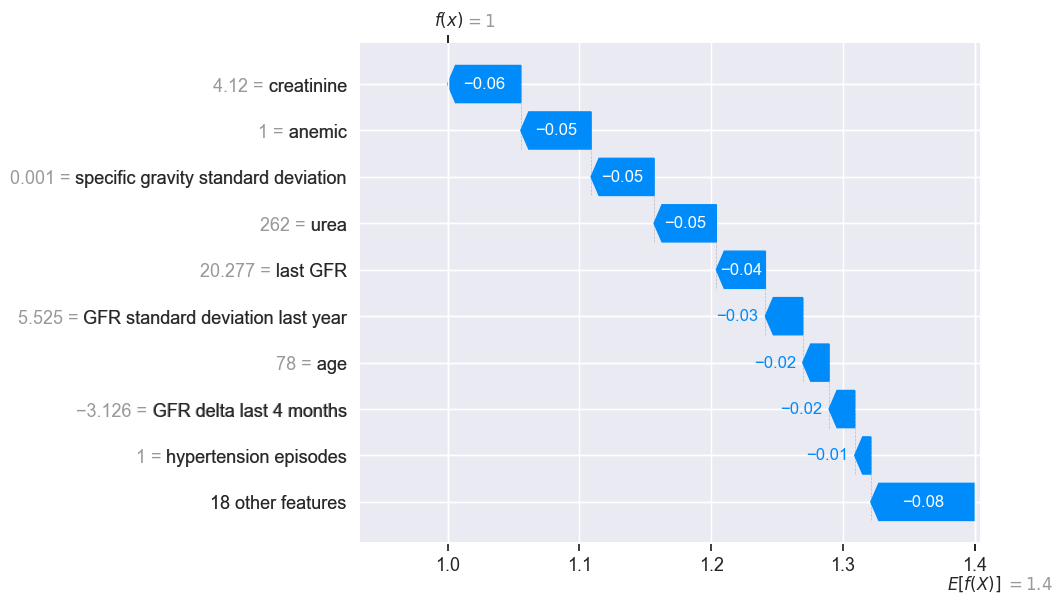

In [32]:
shap.waterfall_plot(shaps[0])

## Three-class model
1:x<6, 2: 6<=x<18, 3:x>=18

In [33]:
def three_classes(x):
    if x<6:
        return 1
    if x>=6 and x<18:
        return 2
    if x>=18:
        return 3    

In [34]:
all_data['class'] = all_data['months until dialysis'].map(three_classes)

<AxesSubplot:ylabel='count'>

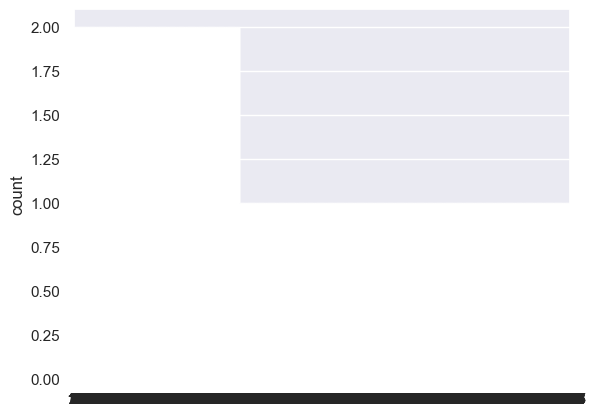

In [35]:
sns.countplot(all_data['class']) 

In [36]:
X = all_data[SELECTED_27_FEATURES].iloc[:,:-1]
y = all_data['class']

In [38]:
etc_3 = ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=499, verbose=0,
                     warm_start=False)

In [39]:
etc_3.fit(X,y)

ExtraTreesClassifier(n_jobs=-1, random_state=499)

In [40]:
etc_3.predict_proba(X.iloc[3:4,:])

array([[0., 1., 0.]])

In [41]:
explainer = shap.Explainer(etc_3.predict,X)

In [42]:
shap_values = explainer(X.iloc[3:4,:])

In [43]:
shap.force_plot(shap_values[0])

In [44]:
pickle.dump(etc_3,open('etc_3c.pkl','wb'))
pickle.dump(explainer, open('explainer_3c.pkl', 'wb'))

In [45]:
etc_file = pickle.load(open('etc_3c.pkl','rb'))
explainer_file = pickle.load(open('explainer_3c.pkl','rb'))

In [46]:
etc_file.predict_proba(X.iloc[3:4,:])

array([[0., 1., 0.]])

In [47]:
shaps = explainer_file(X.iloc[3:4,:])
shap.force_plot(shaps[0])

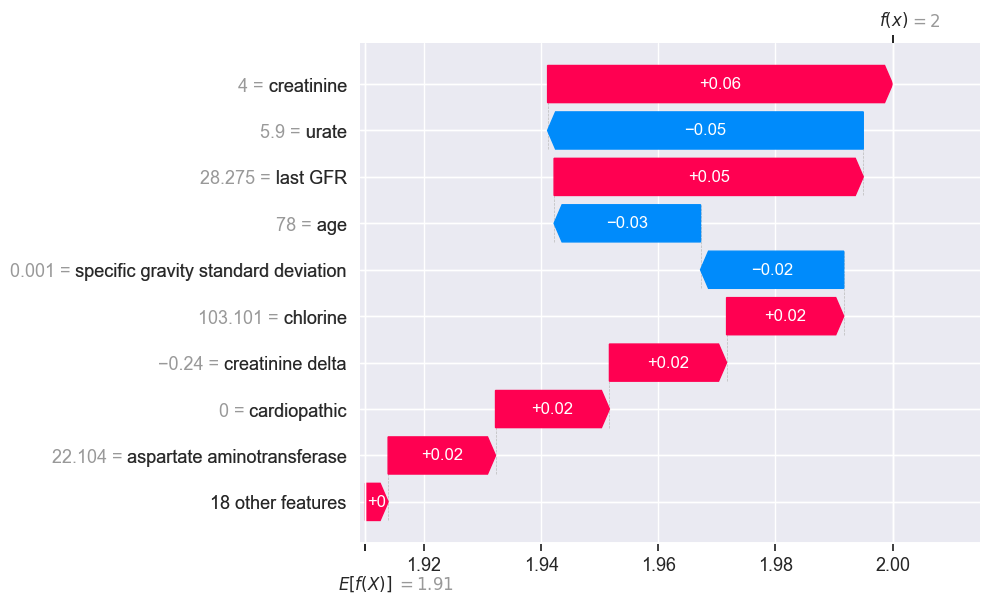

In [48]:
shap.waterfall_plot(shaps[0])

## Four-class model
1:x<6, 2: 6<=x<14,3: 14<=x<24,4:x>=24

In [49]:
def four_classes(x):
    if x<6:
        return 1
    if x>=6 and x<14:
        return 2
    if x>=14 and x<24:
        return 3
    if x>=24:
        return 4

In [50]:
all_data['class'] = all_data['months until dialysis'].map(four_classes)

In [51]:
sns.countplot(all_data['class'])

<AxesSubplot:ylabel='count'>

In [49]:
X = all_data[SELECTED_27_FEATURES].iloc[:,:-1]
y = all_data['class']

In [50]:
etc_4 = ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=2371, verbose=0,
                     warm_start=False)

In [51]:
etc_4.fit(X,y)

ExtraTreesClassifier(n_jobs=-1, random_state=2371)

In [52]:
explainer = shap.Explainer(etc_4.predict,X)

In [53]:
shap_valuesp = explainer(X.iloc[3:4,:]) 

In [54]:
shap_values = shap_valuesp

In [55]:
shap.force_plot(shap_values[0])

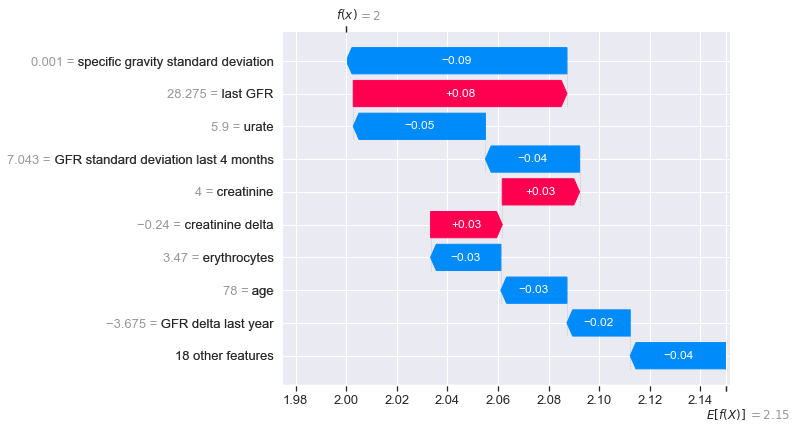

In [56]:
shap.waterfall_plot(shap_values[0])

In [57]:
pickle.dump(etc_4,open('etc_4c.pkl','wb'))
pickle.dump(explainer, open('explainer_4c.pkl', 'wb'))

In [58]:
etc_file = pickle.load(open('etc_4c.pkl','rb'))
explainer_file = pickle.load(open('explainer_4c.pkl','rb'))

In [59]:
etc_file.predict_proba(X.iloc[3:4,:])

array([[0., 1., 0., 0.]])

In [60]:
shaps = explainer_file(X.iloc[3:4,:])
shap.force_plot(shaps[0])

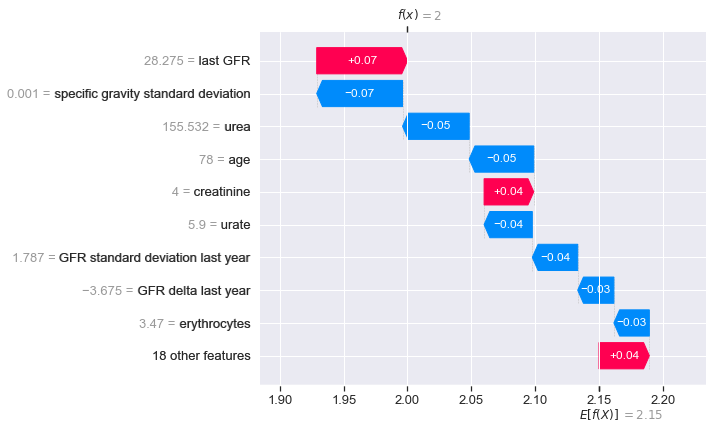

In [61]:
shap.waterfall_plot(shaps[0])